In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import sklearn.tree # need decision tree classifier for comparison
from sklearn.metrics import confusion_matrix # performance metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score # performance metrics

In [29]:
def PlotConfusionMatrix(model,test_x,test_y):
  predict_y = model.predict(test_x)
  plt.figure(figsize=(5, 4))
  sns.heatmap(confusion_matrix(test_y, predict_y), cmap = 'Reds', annot = True, fmt = "1")
  plt.xlabel('Predicted', size = 12, weight = 'bold')
  plt.ylabel('Actual', size = 12, weight = 'bold')
  plt.title('Confusion Matrix', weight = 'bold')
  plt.show()

In [30]:
def CalculateAccuracy(model,model_name,test_x,test_y):
  print("Performance of",str(model_name))
  y_pred = model.predict(test_x)
  accuracy = accuracy_score(test_y, y_pred)
  precision = precision_score(test_y, y_pred,average="macro")
  recall = recall_score(test_y, y_pred,average="macro")
  print("Accuracy", round(100*accuracy,1),"%")
  print("Precision",round(100*precision,1),"%")
  print("Recall",   round(100*recall,1),"%")

In [31]:
# read the data
dataset_file = "IrisData.xlsx"
data = pd.read_excel(dataset_file)

# remove missing values
data.dropna()

data

,leaf.length,leaf.width,flower.length,flower.width,plant
0,5.4,3.7,1.5,0.2,Arctica
1,4.8,3.4,1.6,0.2,Arctica
2,4.8,3.0,1.4,0.1,Arctica
3,4.3,3.0,1.1,0.1,Arctica
4,5.8,4.0,1.2,0.2,Arctica
...,...,...,...,...,...
115,6.7,3.0,5.2,2.3,Carolinian
116,6.3,2.5,5.0,1.9,Carolinian
117,6.5,3.0,5.2,2.0,Carolinian
118,6.2,3.4,5.4,2.3,Carolinian


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   leaf.length    120 non-null    float64
 1   leaf.width     120 non-null    float64
 2   flower.length  120 non-null    float64
 3   flower.width   120 non-null    float64
 4   plant          120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


In [33]:
data['plant'].value_counts()

plant
Arctica       40
Harlequin     40
Carolinian    40
Name: count, dtype: int64

In [34]:
print(f'# duplicate rows: {data.duplicated().sum()}')

# duplicate rows: 0


In [35]:
# Splitting the data

x = data.drop(columns='plant')
y = data['plant']

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, stratify=y, random_state=10)
print("training data:",len(train_x),"rows")
print("testing data:",len(test_x),"rows")
print()
print("train y:\n", train_y.value_counts())
print()
print("test y:\n", test_y.value_counts())

training data: 96 rows
testing data: 24 rows

train y:
 plant
Arctica       32
Harlequin     32
Carolinian    32
Name: count, dtype: int64

test y:
 plant
Harlequin     8
Carolinian    8
Arctica       8
Name: count, dtype: int64


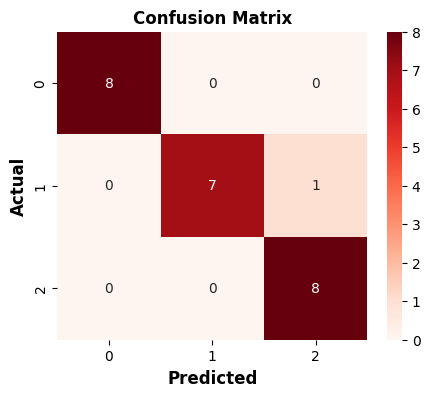

Performance of New decision tree
Accuracy 95.8 %
Precision 96.3 %
Recall 95.8 %


In [36]:
from NewDecisionTreeClassifier import NewDecisionTreeClassifier

# check performance of our decision tree classifier
decisionTreeClassifier = NewDecisionTreeClassifier()
decisionTreeClassifier.fit(train_x, train_y)

PlotConfusionMatrix(decisionTreeClassifier, test_x, test_y)
CalculateAccuracy(decisionTreeClassifier,"New decision tree",test_x, test_y);

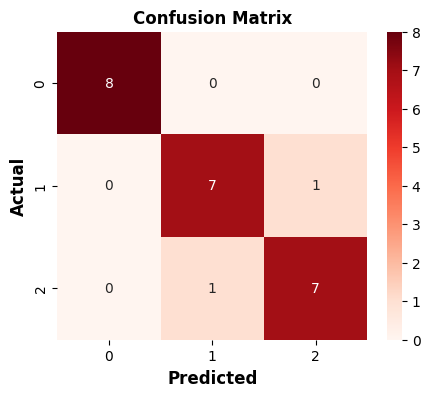

Performance of SKLEARN Decision Tree
Accuracy 91.7 %
Precision 91.7 %
Recall 91.7 %


In [37]:
# compare with performance of sklearn decision tree classifier
decisionTreeClassifier = sklearn.tree.DecisionTreeClassifier()
decisionTreeClassifier.fit(train_x, train_y)

PlotConfusionMatrix(decisionTreeClassifier, test_x, test_y)
CalculateAccuracy(decisionTreeClassifier, "SKLEARN Decision Tree", test_x, test_y)